In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [4]:
df = pd.read_excel("C:\\Users\\nurbo\\Аналитика данных Just Code 2024\\walmart fb python ab test.xlsx")
df.head()

AB Test id  Age Occupation Category   Salary      Area  Phone number  \
0           1   58         blue collar  1225.10  suburban   13527902378   
1           2   52         blue collar  6314.43     urban   13065990169   
2           3   53        white collar  7444.18     rural   14172254045   
3           4   44        white collar  5042.88  suburban   14740239783   
4           5   42         blue collar  5968.37     rural   14330262175   

  Age category       Date  Purchase amount GROUP AB test Date  \
0   Middle Age 2021-05-17            61.25     A   2024-11-03   
1   Middle Age 2020-06-28           112.79     B   2024-11-08   
2   Middle Age 2021-03-24            64.30     A   2024-11-09   
3   Middle Age 2021-02-12           277.41     B   2024-11-09   
4   Middle Age 2021-07-24           149.20     A   2024-10-26   

   New Purchase amount  
0               193.00  
1               225.58  
2               195.00  
3               554.82  
4               117.00

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AB Test id           1190 non-null   int64         
 1   Age                  1190 non-null   int64         
 2   Occupation Category  1190 non-null   object        
 3   Salary               1190 non-null   float64       
 4   Area                 1190 non-null   object        
 5   Phone number         1190 non-null   int64         
 6   Age category         1190 non-null   object        
 7   Date                 1190 non-null   datetime64[ns]
 8   Purchase amount      1190 non-null   float64       
 9   GROUP                1190 non-null   object        
 10  AB test Date         1190 non-null   datetime64[ns]
 11  New Purchase amount  1190 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 111.7+ KB


In [6]:
group_a_control = df[df['GROUP'] == 'A']['New Purchase amount']
group_a_control

0       193.0
2       195.0
4       117.0
6        59.0
8        55.0
        ...  
1180     78.0
1182     84.0
1184    122.0
1186    179.0
1188    109.0
Name: New Purchase amount, Length: 595, dtype: float64

In [7]:
group_b_test = df[df['GROUP'] == 'B']['New Purchase amount']
group_b_test

1       225.58
3       554.82
5       782.92
7       183.48
9       975.80
         ...  
1181    937.76
1183    539.06
1185    751.96
1187    270.80
1189    578.02
Name: New Purchase amount, Length: 595, dtype: float64

In [11]:
f'{group_a_control.sum()} - сумма покупок контрольной группы'

'88613.0 - сумма покупок контрольной группы'

In [12]:
f'{group_b_test.sum()} - сумма покупок тестовой группы'

'327488.80000000005 - сумма покупок тестовой группы'

In [13]:
group_a_control.mean()

148.9294117647059

In [14]:
group_b_test.mean()

550.4013445378152

In [15]:
stats.shapiro(group_a_control)

ShapiroResult(statistic=0.9491411634305916, pvalue=1.945034898277749e-13)

In [16]:
stats.shapiro(group_b_test)

ShapiroResult(statistic=0.9497497486697254, pvalue=2.4119703096205105e-13)

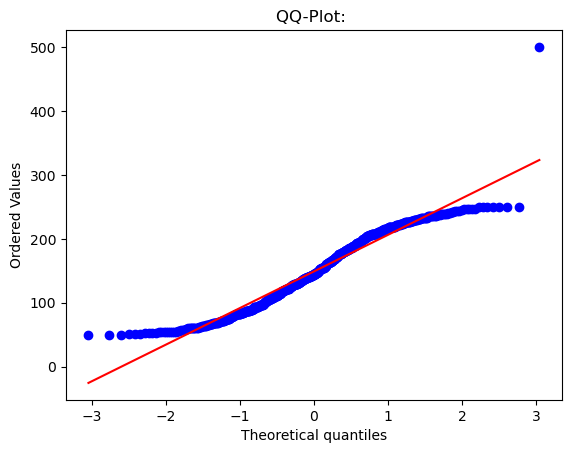

In [17]:
stats.probplot(group_a_control, dist="norm", plot=plt)
plt.title('QQ-Plot: ')
plt.show()

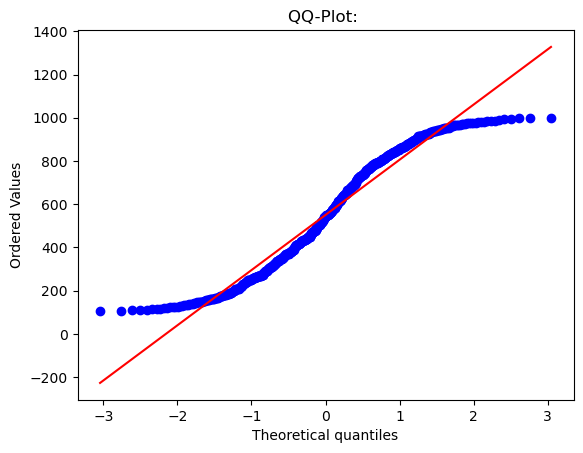

In [18]:
stats.probplot(group_b_test, dist="norm", plot=plt)
plt.title('QQ-Plot: ')
plt.show()

In [20]:
stats.mannwhitneyu(group_a_control, group_b_test)

MannwhitneyuResult(statistic=20051.0, pvalue=1.666681921120721e-154)